In [ ]:
# dask_kaggle_Delayed
# https://www.kaggle.com/puneetgrover/speed-up-your-algorithms-dask

In [3]:
# import dask.bag as db
# import dask.dataframe as dd
import numpy as np

In [1]:
import dask.delayed as delay

@delay
def sq(x):
  return x**2

@delay
def add(x, y):
  return x+y

@delay
def sum(arr):
  sum = 0
  for i in range(len(arr)): sum+=arr[i]
  return sum

In [5]:
# Adding tasks here is like adding nodes to graphs.
# You can add new taks based on results of prevoius tasks.
# Dask won't compute them right away. 
# It will make a graph as you call them. And then Compute the whole graph parallely.
lst = list(np.arange(1, 11))

for i in range(3):
  temp = []
  if i == 0:
    for j in range(0, len(lst)):
      temp.append(sq(lst[j]))
  elif i == 1:
    for j in range(0, len(lst)-1, 2):
      temp.append(add(lst[j], lst[j+1]))
  else:
    temp.append(sum(lst))
  lst = temp # New functions will be computed on last results


In [6]:
lst

[Delayed('sum-c493a9a5-d700-4040-8978-26724479c88f')]

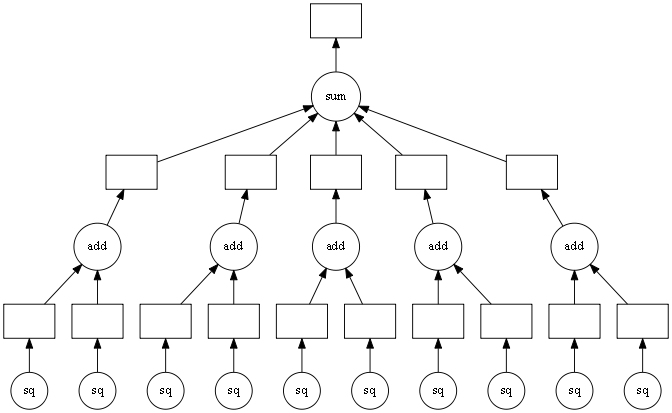

In [7]:
lst[0].visualize(size="7,10!")


In [8]:
lst[0].compute()

385